## 非平衡数据集

当遇到非平衡数据集时，可能需要校准了。如 prior-correction 和 weighting 了。


实验说明，在下面的数据集中；原始的全量数据集的正负样本比例是 9:1。进行抽样完成后的正负样本比例为, 1:1;

In [326]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [327]:
countOne = 0
countZero = 0
fullset = []
probs = []
for i in range(10000):
    x = np.random.randn() # 正态分布, μ = 0, ẟ = 1
    p = 1 / (1 + np.exp(-(2 * x - 3.35)))
    y = np.random.binomial(1, p) # Binomial 分布，概率为 p
    if y == 1:
        countOne += 1
    else:
        countZero += 1
    fullset.append([x, y])
    probs.append(p)

subset = []
for (x, y) in fullset:
    if y == 1 or (y == 0 and np.random.uniform() < 1/9):
        subset.append([x, y])
#         print(x, y)

full_df = pd.DataFrame(fullset, columns=['x', 'y'])
sub_df = pd.DataFrame(subset, columns=['x', 'y'])

In [328]:
data = np.array(fullset)

(array([  4.,   5.,   1.,   3.,   6.,  12.,  16.,  29.,  40.,  44.,  69.,
        109., 131., 160., 215., 241., 299., 310., 391., 474., 481., 528.,
        557., 576., 575., 571., 536., 504., 474., 471., 382., 369., 304.,
        260., 209., 149., 131., 102.,  82.,  44.,  50.,  26.,  20.,  14.,
         13.,   4.,   3.,   2.,   3.,   1.]),
 array([-3.54332739, -3.39903169, -3.25473598, -3.11044028, -2.96614458,
        -2.82184887, -2.67755317, -2.53325747, -2.38896176, -2.24466606,
        -2.10037036, -1.95607465, -1.81177895, -1.66748324, -1.52318754,
        -1.37889184, -1.23459613, -1.09030043, -0.94600473, -0.80170902,
        -0.65741332, -0.51311761, -0.36882191, -0.22452621, -0.0802305 ,
         0.0640652 ,  0.2083609 ,  0.35265661,  0.49695231,  0.64124802,
         0.78554372,  0.92983942,  1.07413513,  1.21843083,  1.36272653,
         1.50702224,  1.65131794,  1.79561365,  1.93990935,  2.08420505,
         2.22850076,  2.37279646,  2.51709216,  2.66138787,  2.80568357,
 

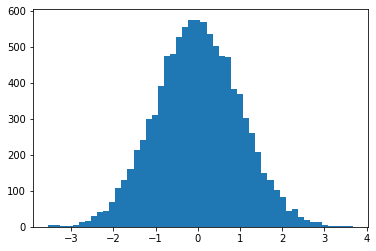

In [329]:
plt.hist(data[:,0], 50)

(array([3.906e+03, 1.408e+03, 8.380e+02, 5.440e+02, 4.140e+02, 3.370e+02,
        2.950e+02, 2.250e+02, 1.890e+02, 1.780e+02, 1.460e+02, 1.270e+02,
        1.280e+02, 9.300e+01, 9.400e+01, 7.800e+01, 8.500e+01, 8.300e+01,
        6.100e+01, 4.900e+01, 6.700e+01, 4.300e+01, 5.100e+01, 3.300e+01,
        3.900e+01, 3.900e+01, 4.100e+01, 3.200e+01, 2.700e+01, 3.500e+01,
        2.400e+01, 2.900e+01, 2.200e+01, 2.600e+01, 2.600e+01, 2.100e+01,
        1.700e+01, 1.200e+01, 1.500e+01, 1.600e+01, 2.400e+01, 1.100e+01,
        1.200e+01, 1.100e+01, 1.200e+01, 1.000e+01, 1.100e+01, 7.000e+00,
        3.000e+00, 6.000e+00]),
 array([2.93363229e-05, 1.96665142e-02, 3.93036921e-02, 5.89408701e-02,
        7.85780480e-02, 9.82152259e-02, 1.17852404e-01, 1.37489582e-01,
        1.57126760e-01, 1.76763938e-01, 1.96401115e-01, 2.16038293e-01,
        2.35675471e-01, 2.55312649e-01, 2.74949827e-01, 2.94587005e-01,
        3.14224183e-01, 3.33861361e-01, 3.53498539e-01, 3.73135717e-01,
        3.927728

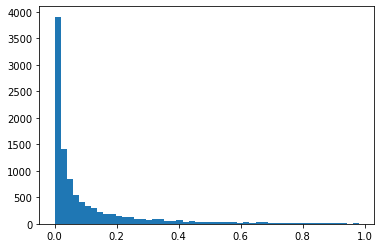

In [330]:
plt.hist(probs, 50)

In [331]:
full_df.describe()

,x,y
count,10000.000000,10000.000000
mean,0.001436,0.108100
std,0.996595,0.310522
min,-3.543327,0.000000
25%,-0.673223,0.000000
50%,-0.010505,0.000000
75%,0.683292,0.000000
max,3.671458,1.000000


In [332]:
full_df['y'].value_counts(normalize=True)

0    0.8919
1    0.1081
Name: y, dtype: float64

(array([8919.,    0., 1081.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

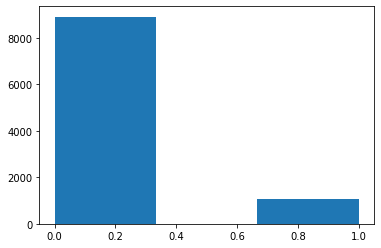

In [333]:
plt.hist(full_df['y'].values, 3)

In [334]:
sub_df.describe()

,x,y
count,2098.000000,2098.000000
mean,0.564660,0.515253
std,1.106992,0.499886
min,-3.369616,0.000000
25%,-0.221063,0.000000
50%,0.652575,1.000000
75%,1.370715,1.000000
max,3.671458,1.000000


In [335]:
sub_df['y'].value_counts(normalize=True)

1    0.515253
0    0.484747
Name: y, dtype: float64

(array([1017.,    0., 1081.]),
 array([0.        , 0.33333333, 0.66666667, 1.        ]),
 <a list of 3 Patch objects>)

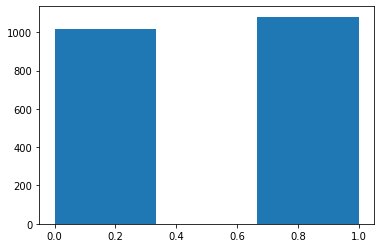

In [336]:
plt.hist(sub_df['y'], 3)

### 在 1:1 的抽样数据上训练


In [337]:
from sklearn.linear_model import LogisticRegression

In [338]:
X = sub_df['x'].values.reshape(-1,1)
y = sub_df['y'].values
lr = LogisticRegression(class_weight=None,solver='lbfgs').fit(X, y)
print("coef:", lr.coef_)
print("interpret:", lr.intercept_)

coef: [[1.83168874]]
interpret: [-1.00309902]


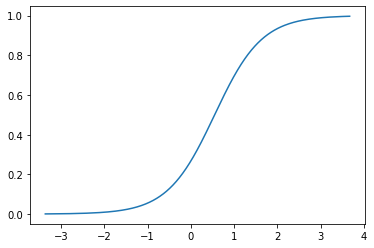

In [339]:
X.sort(axis=0)
sub_X = X
sub_y_pred = lr.predict_proba(X)
plt.plot(sub_X[:,0], sub_y_pred[:,1])

In [340]:
p1 = full_df['y'].value_counts(normalize=True)[1] # 原始数据集的先验概率
r1 = sub_df['y'].value_counts(normalize=True)[0] # 采样后数据集的先验概率
de = r1 * (1 - p1)
no = (1-r1) * p1
off = np.log(de/no)
lr.intercept_ -= off

coef: [[1.83168874]]
interpret: [-3.05236689]


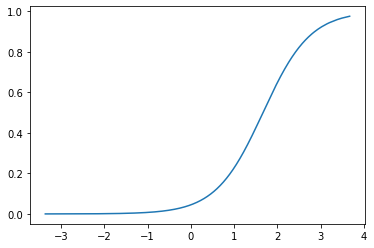

In [341]:
print("coef:", lr.coef_)
print("interpret:", lr.intercept_)
sub_y_pred_adjusted = lr.predict_proba(X)
plt.plot(sub_X[:,0], sub_y_pred_adjusted[:,1])

### 在 1:9 的原始数据上训练

In [342]:
X = full_df['x'].values.reshape(-1,1)
y = full_df['y'].values
lr =  LogisticRegression(class_weight=None,solver='lbfgs').fit(X, y)
print("coef:", lr.coef_)
print("interpret:", lr.intercept_)

coef: [[1.91985387]]
interpret: [-3.21958864]


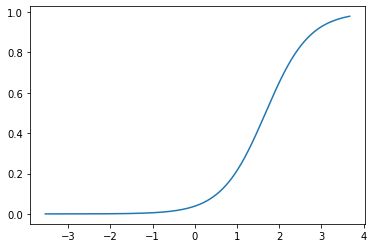

In [343]:
X.sort(axis=0)
full_y_pred = lr.predict_proba(X)
full_X = X
plt.plot(full_X[:,0], full_y_pred[:,1])

可以看到原始数据与抽样数据集上训练的参数是一样的，但是 intercept/bias 是不一样的。这就需要我们来修正。

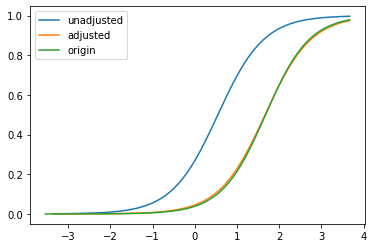

In [344]:
plt.plot(sub_X[:,0], sub_y_pred[:,1], label='unadjusted')
plt.plot(sub_X[:,0], sub_y_pred_adjusted[:,1], label='adjusted')
plt.plot(full_X[:,0], full_y_pred[:,1], label='origin')
plt.legend()


### 最好的解释

1. [Logistic-Regression: Prior correction at test time](https://stats.stackexchange.com/questions/117592/logistic-regression-prior-correction-at-test-time)
2. [Usage Note 22601: Adjusting for oversampling the event level in a binary logistic model](http://support.sas.com/kb/22/601.html)